In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv('titanic.csv')

In [3]:
df.shape

(891, 12)

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#from sklearn.utils import shuffle

#df=shuffle(df,random_state=35)
df = df.reindex(np.random.permutation(df.index))

df.shape
df

n=int(3*df.shape[0]/4)
n

train=df.loc[:n,]
train.shape

test=df.loc[n:,]
test.shape

In [8]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.25, random_state=42, shuffle=True)

In [9]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
298,299,1,1,"Saalfeld, Mr. Adolphe",male,NaN,0,0,19988,30.5000,C106,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.00,0,0,SOTON/OQ 392076,7.0500,NaN,S
247,248,1,2,"Hamalainen, Mrs. William (Anna)",female,24.00,0,2,250649,14.5000,NaN,S
478,479,0,3,"Karlsson, Mr. Nils August",male,22.00,0,0,350060,7.5208,NaN,S
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S


In [10]:
test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
709,710,1,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,1,1,2661,15.2458,NaN,C
439,440,0,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.0,0,0,C.A. 18723,10.5000,NaN,S
840,841,0,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.0,0,0,SOTON/O2 3101287,7.9250,NaN,S
720,721,1,2,"Harper, Miss. Annie Jessie ""Nina""",female,6.0,0,1,248727,33.0000,NaN,S
39,40,1,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,2651,11.2417,NaN,C


In [11]:
train.shape,test.shape

((668, 12), (223, 12))

## Prediction using Simple Mode 

In [12]:
test['Simple_Mode']=train['Survived'].mode()[0]

In [13]:
accuracy_score(test['Simple_Mode'],test['Survived'])*100

60.0896860986547

## Prediction using Mode on basis of Sex

In [14]:
pd.crosstab(train['Survived'],train['Sex'])

Sex,female,male
Survived,,
0,59,356
1,170,83


In [15]:
test['Gender_Mode']=-1
for i in test['Sex'].unique():
    test['Gender_Mode'][(test['Sex']==str(i))]=train['Survived'][train['Sex']==i].mode()[0]

In [16]:
accuracy_score(test['Survived'],test['Gender_Mode'])*100

78.47533632286996

In [17]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [18]:
df['Pclass'].unique()

array([3, 1, 2], dtype=int64)

# Building Prediction Model Using KNN

In [19]:
df.shape

(891, 12)

In [20]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [21]:
df['Age']=df['Age'].fillna(value= df['Age'].mean())

In [22]:
df["Cabin"].value_counts().sum()


204

In [23]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [24]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [25]:
df['Ticket'].value_counts()

347082       7
1601         7
CA. 2343     7
347088       6
CA 2144      6
            ..
345781       1
2693         1
65303        1
28228        1
A/5. 3337    1
Name: Ticket, Length: 681, dtype: int64

In [26]:
cleaned_df=df.drop(['PassengerId', 'Name', 'Cabin','Ticket'], axis=1)

In [27]:
cleaned_df=pd.get_dummies(cleaned_df)

In [28]:
cleaned_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


## Segregating Variable

In [29]:
x = cleaned_df.drop(['Survived'], axis=1)

In [30]:
y = cleaned_df['Survived']

In [31]:
x.shape,y.shape

((891, 10), (891,))

## Scaling of data

In [32]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
scaledx=scale.fit_transform(x)

In [33]:
x = pd.DataFrame(scaledx, columns=x.columns)

## Dividing Data into Test and Train

In [34]:
from sklearn.model_selection import train_test_split
trainx, testx, trainy, testy = train_test_split(x, y, random_state= 56, stratify= y)

## Implementing KNN Classifier

In [35]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import f1_score

In [36]:
def KNNAlgo(n=5):

    #Training Model
    clf= KNN(n_neighbors= n)
    clf.fit(trainx,trainy)
    
    #Prdiction Testing
    test_predict= clf.predict(testx)
    k = f1_score(test_predict, testy)
    print(f'F1 score: {round(k*100,2)}%')

In [37]:
KNNAlgo()


F1 score: 69.94%


## Finding value of k that gives best prediction(Least Error)

In [38]:
err=[]
for i in range(3,20,1):
    tclf=KNN(n_neighbors= i)
    tclf.fit(trainx,trainy)

    tpredict= tclf.predict(testx)
    e = f1_score(tpredict, testy)
    
    e=1-e
    err.append(e)

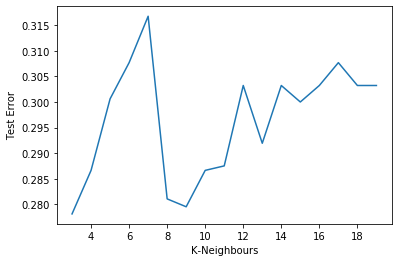

In [39]:
plt.plot(range(3,20,1), err)
plt.xlabel('K-Neighbours')
plt.ylabel('Test Error')
plt.show()

From above graph it is evident that we get best results when the value of k is 9, hence ow putting value of k as 9 and finding the f1 score

In [40]:
KNNAlgo(n=9)

F1 score: 72.05%


In [41]:
# Hence our model is able to predict with 72% accuracy

## Visualising Best, Under and Overfitting

In [44]:
data=pd.read_csv('data_cleaned.csv')
data.shape

(891, 25)

In [45]:
data.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,38.0,71.2833,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,1,26.0,7.9250,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,35.0,53.1000,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,35.0,8.0500,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1


In [46]:
data.isnull().sum()

Survived      0
Age           0
Fare          0
Pclass_1      0
Pclass_2      0
Pclass_3      0
Sex_female    0
Sex_male      0
SibSp_0       0
SibSp_1       0
SibSp_2       0
SibSp_3       0
SibSp_4       0
SibSp_5       0
SibSp_8       0
Parch_0       0
Parch_1       0
Parch_2       0
Parch_3       0
Parch_4       0
Parch_5       0
Parch_6       0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [49]:
# Segregating Dependent and independent Variables

x=data.drop(['Survived'], axis=1)
y=data['Survived']
x.shape,y.shape

((891, 24), (891,))

In [54]:
# Scaling data

from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x = ss.fit_transform(x)

In [55]:
# Dividing data into train and test set

from sklearn.model_selection import train_test_split
trainx, testx, trainy ,testy = train_test_split(x, y, random_state= 96, stratify= y)

In [58]:
# Applying KNN Algo

from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import f1_score

clf= KNN(n_neighbors=1)

clf.fit(trainx,trainy)

test_predict = clf.predict(testx)
test_f1=f1_score(test_predict, testy)

train_predict = clf.predict(trainx)
train_f1=f1_score(train_predict, trainy)

test_f1, train_f1

(0.7011494252873564, 0.9766536964980544)

In [73]:
# finding optimal value of k using a function
x=range(1,150)
def calcF1(k):
    trainscore=[]
    testscore=[]
    for i in k:
        clf= KNN(n_neighbors=i)

        clf.fit(trainx,trainy)

        test_predict = clf.predict(testx)
        test_f1=f1_score(test_predict, testy)

        train_predict = clf.predict(trainx)
        train_f1=f1_score(train_predict, trainy)

        trainscore.append(train_f1)
        testscore.append(test_f1)

    return trainscore, testscore

trainscore, testscore = calcF1(x)

    

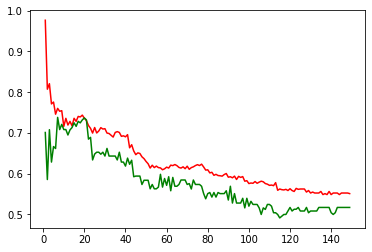

In [74]:
plt.plot(x, trainscore, c='red')
plt.plot(range(3,125), testscore, c='green')

Conclusion:

Bestfit at around = 20,
Underfit above 20,
Overfit between 0-10